In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')


In [2]:
transaction_df = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
purchase_df = pd.read_excel('Purchase_behaviour.xlsx')
purchase_df.drop('Unnamed: 0',inplace=True,axis=1,)

In [4]:
purchase_df = purchase_df.rename(columns=purchase_df.iloc[0])
purchase_df.drop(index=0,axis=0,inplace=True)

#### DATA CLEANING

In [5]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


##### converting date to correct format

In [7]:
transaction_df['converted_date'] = pd.to_datetime(transaction_df['DATE'],origin='1899-12-30',unit='D')

##### EXtracting chips info

In [8]:
transaction_df_chips = transaction_df[transaction_df['PROD_NAME'].str.contains('chip',case=False)]
transaction_df_chips.nunique()


DATE                364
STORE_NBR           265
LYLTY_CARD_NBR    43625
TXN_ID            74438
PROD_NBR             33
PROD_NAME            33
PROD_QTY              5
TOT_SALES            40
converted_date      364
dtype: int64

Down to 33 different flavours of chips

In [9]:
distribution_by_name = (transaction_df_chips.groupby('PROD_NAME').agg({'TOT_SALES': 'sum'}).
                        sort_values(by='TOT_SALES',ascending=False)).head(10).reset_index()


t = distribution_by_name.PROD_NAME.tolist()
distribution_by_name

,PROD_NAME,TOT_SALES
0,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
1,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
2,Doritos Corn Chips Cheese Supreme 170g,27183.2
3,Doritos Corn Chips Nacho Cheese 170g,26562.8
4,Tostitos Smoked Chipotle 175g,26474.8
5,Doritos Corn Chips Original 170g,26228.4
6,Doritos Corn Chip Mexican Jalapeno 150g,23887.5
7,Cobs Popd Sea Salt Chips 110g,23852.6
8,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,23772.8
9,Doritos Corn Chip Southern Chicken 150g,23735.4


In [10]:

distribution_by_qty = (transaction_df_chips.groupby('PROD_NAME').agg({'PROD_QTY': 'sum'}).sort_values(by='PROD_QTY',ascending=False)).reset_index()

distribution_by_qty = distribution_by_qty[distribution_by_qty.PROD_NAME.isin(t)]
distribution_by_qty.reset_index(drop='index',inplace=True)
distribution_by_qty

,PROD_NAME,PROD_QTY
0,Cobs Popd Sea Salt Chips 110g,6277
1,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
2,Doritos Corn Chips Cheese Supreme 170g,6180
3,Smiths Crnkle Chip Orgnl Big Bag 380g,6164
4,Doritos Corn Chip Mexican Jalapeno 150g,6125
5,Smiths Crinkle Chips Salt & Vinegar 330g,6106
6,Doritos Corn Chip Southern Chicken 150g,6086
7,Doritos Corn Chips Nacho Cheese 170g,6037
8,Tostitos Smoked Chipotle 175g,6017
9,Doritos Corn Chips Original 170g,5961


In [11]:
transaction_df_chips['PRICE_PER_UNIT'] = transaction_df_chips['TOT_SALES'] / transaction_df_chips['PROD_QTY']

distribution_by_price = transaction_df_chips.drop_duplicates(subset='PROD_NAME', keep='first')[['PROD_NAME', 'PRICE_PER_UNIT']]
distribution_by_price = distribution_by_price[distribution_by_price.PROD_NAME.isin(t)]
distribution_by_price.reset_index(drop='index',inplace=True)
distribution_by_price

/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_1234/1600876562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['PRICE_PER_UNIT'] = transaction_df_chips['TOT_SALES'] / transaction_df_chips['PROD_QTY']


,PROD_NAME,PRICE_PER_UNIT
0,Smiths Crinkle Chips Salt & Vinegar 330g,5.7
1,Doritos Corn Chip Mexican Jalapeno 150g,3.9
2,Doritos Corn Chip Southern Chicken 150g,3.9
3,Doritos Corn Chips Original 170g,4.4
4,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3.8
5,Cobs Popd Sea Salt Chips 110g,3.8
6,Doritos Corn Chips Cheese Supreme 170g,4.4
7,Smiths Crnkle Chip Orgnl Big Bag 380g,5.9
8,Doritos Corn Chips Nacho Cheese 170g,4.4
9,Tostitos Smoked Chipotle 175g,4.4


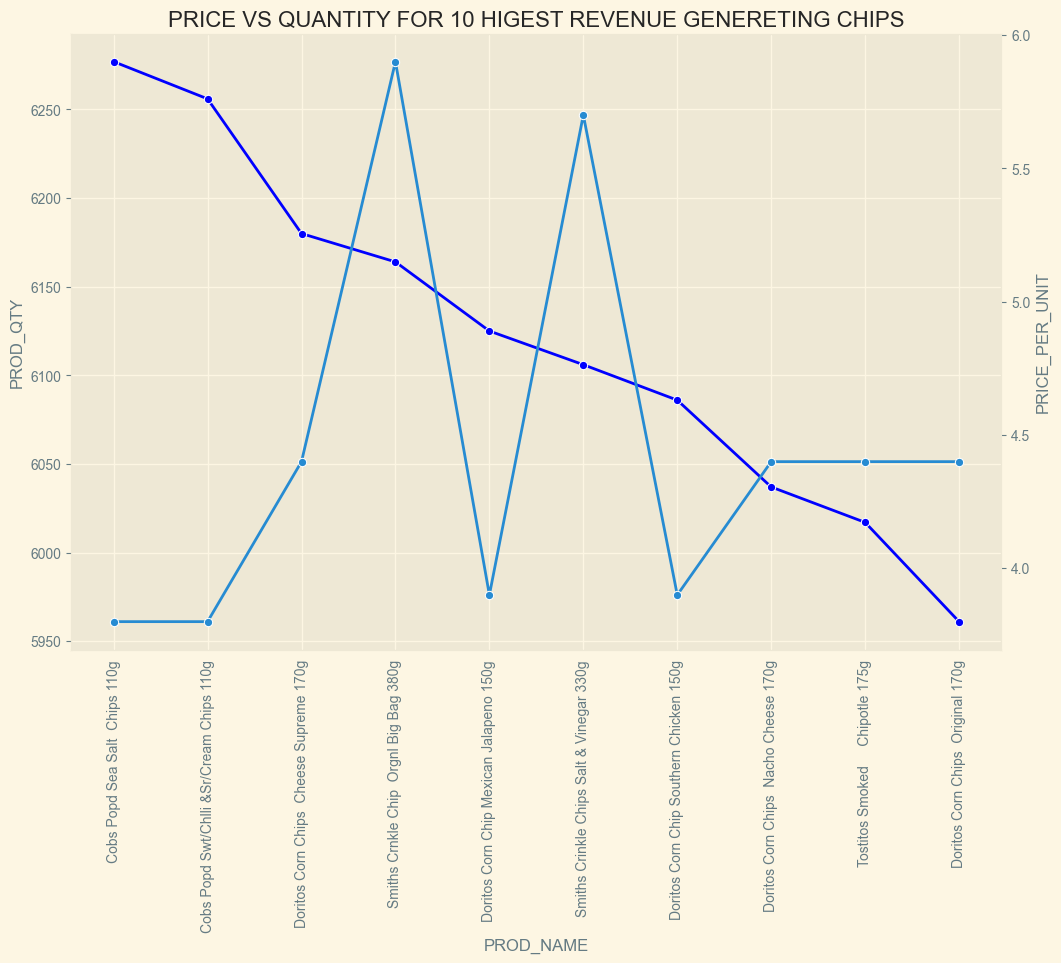

In [12]:
distribution = pd.merge(distribution_by_qty, distribution_by_price, on='PROD_NAME')

plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='PROD_NAME', y='PROD_QTY', data=distribution,color='blue',marker='o')
sns.lineplot(x='PROD_NAME', y='PRICE_PER_UNIT', data=distribution, ax=ax.twinx(),marker='o')
plt.xticks(rotation=90)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.grid(visible=False)
plt.title('PRICE VS QUANTITY FOR 10 HIGEST REVENUE GENERETING CHIPS')
plt.show()

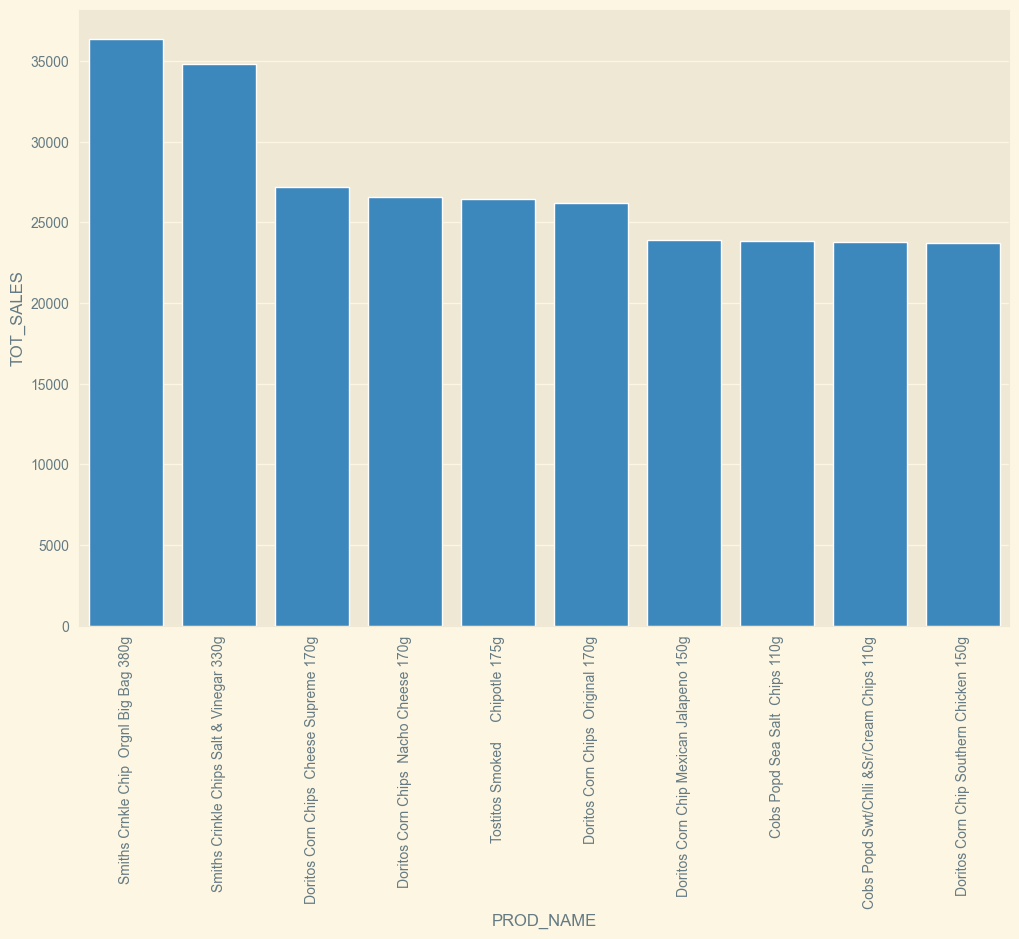

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x=distribution_by_name['PROD_NAME'],y=distribution_by_name['TOT_SALES'])
plt.xticks(rotation=90)
plt.show()

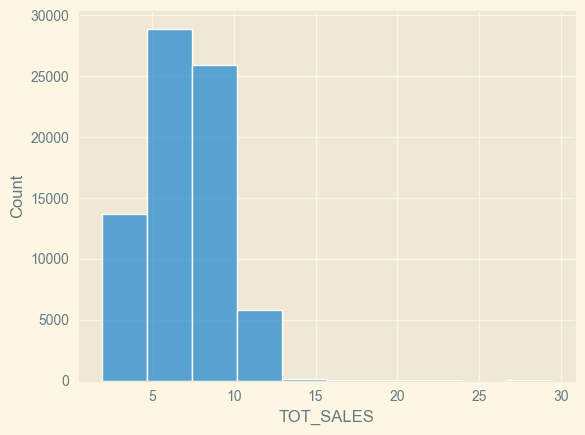

In [14]:
sns.histplot(transaction_df_chips['TOT_SALES'],bins=10)
plt.show()

In [15]:
transaction_df_chips['day_of_week'] = transaction_df_chips['converted_date'].dt.day_name()
transaction_df_chips['month'] = transaction_df_chips['converted_date'].map(lambda x:x.month)

/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_1234/480434810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['day_of_week'] = transaction_df_chips['converted_date'].dt.day_name()
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_1234/480434810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['month'] = transaction_df_chips['converted_date'].map(lambda x:x.month)


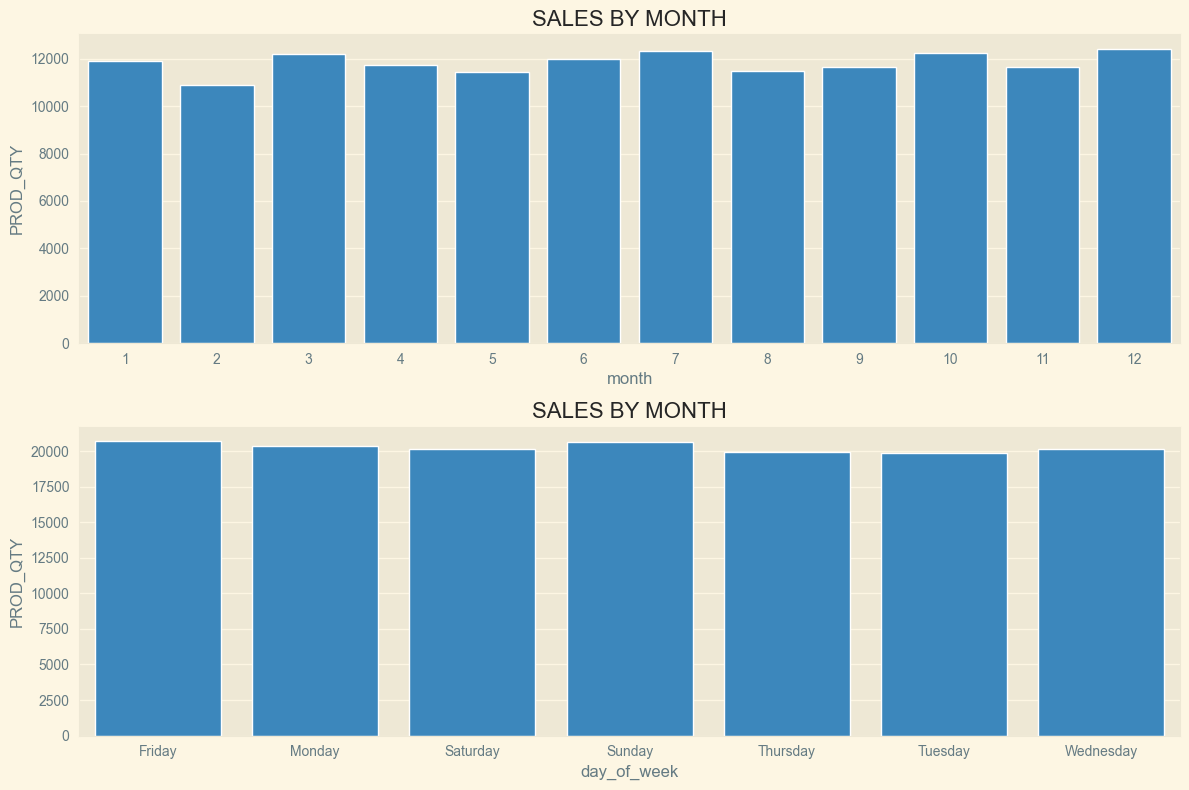

In [16]:
sales_by_month = transaction_df_chips.groupby('month').agg({'PROD_QTY':'sum'})
sales_by_day = transaction_df_chips.groupby('day_of_week').agg({'PROD_QTY':'sum'})
plt.figure(figsize=(12,8))


plt.subplot(2,1,1)
sns.barplot(y='PROD_QTY',x='month',data=sales_by_month,)
plt.title('SALES BY MONTH')

plt.subplot(2,1,2)

sns.barplot(y='PROD_QTY',x='day_of_week',data=sales_by_day)
plt.title('SALES BY MONTH')

plt.tight_layout()
plt.show()

Hm can run discounts and campaings to increase sales for feburary month

##### Extracting weights from each transaction

In [17]:
transaction_df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,converted_date,PRICE_PER_UNIT,day_of_week,month
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,Wednesday,10
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,Monday,5
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00,Friday,8
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,5.70,Thursday,5
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20,3.90,Monday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
264815,43408,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,2018-11-04,3.80,Sunday,11
264816,43614,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-29,3.80,Wednesday,5
264826,43549,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-03-25,3.80,Monday,3
264830,43416,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,2018-11-12,3.30,Monday,11


/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_1234/946371355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['weight'] = transaction_df_chips['PROD_NAME'].str.extract(r'(\d+)')
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_1234/946371355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['weight'] = pd.to_numeric(transaction_df_chips['weight'], errors='coerce')


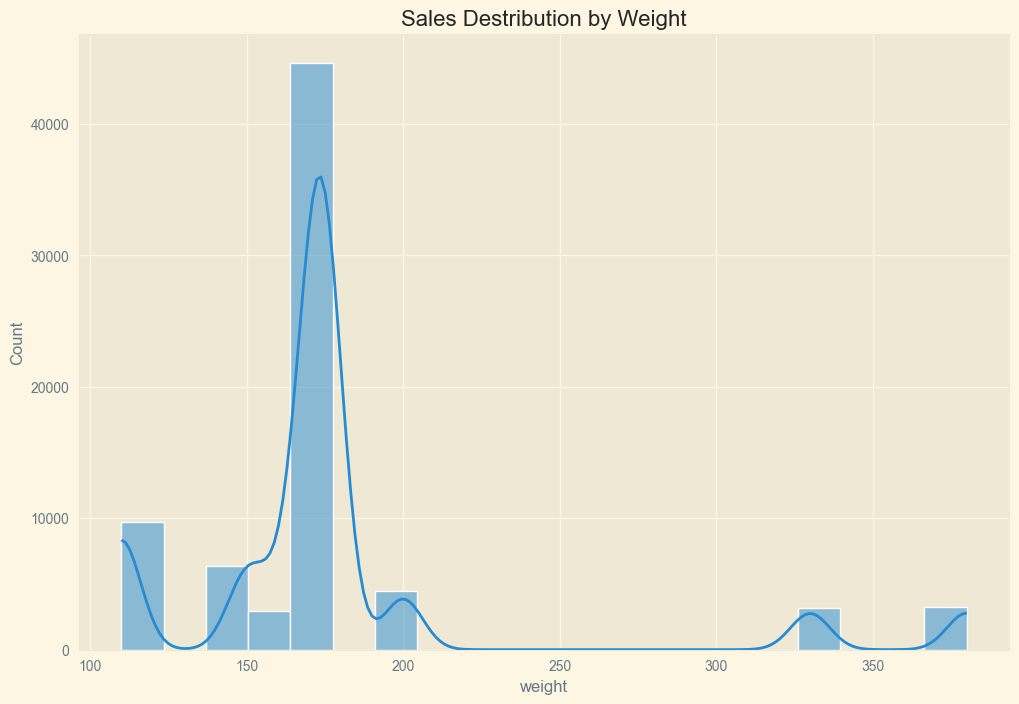

In [18]:
transaction_df_chips['weight'] = transaction_df_chips['PROD_NAME'].str.extract(r'(\d+)')
transaction_df_chips['weight'] = pd.to_numeric(transaction_df_chips['weight'], errors='coerce')

import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(data=transaction_df_chips['weight'],kde=True,bins=20)
plt.title('Sales Destribution by Weight')
plt.show()



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

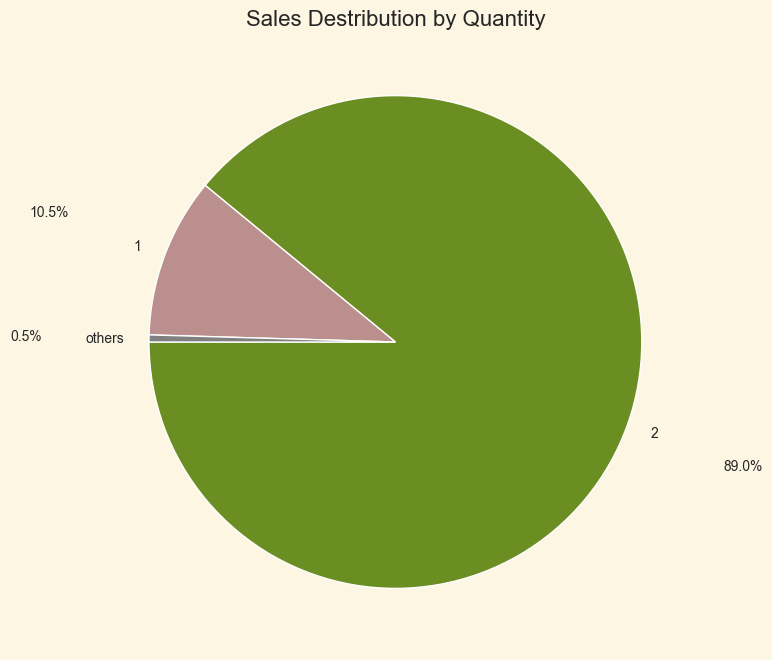

In [19]:
quantity_destribution = transaction_df_chips['PROD_QTY'].value_counts()
total= quantity_destribution.sum()


threshold = total*.05


small = quantity_destribution[quantity_destribution<threshold]
quantity_destribution_reduced = quantity_destribution[quantity_destribution >= threshold]
quantity_destribution_reduced['others'] = small.sum()


plt.figure(figsize=(12,8))
plt.pie(quantity_destribution_reduced,labels=quantity_destribution_reduced.index,
        autopct='%1.1f%%',startangle=180,pctdistance=1.5,
       colors = ['olivedrab', 'rosybrown', 'gray'])
plt.title('Sales Destribution by Quantity')
plt.axes('equal')

plt.show() 

In [23]:
company_name = ['Smiths','Doritos','Thins','Cobs','WW','Natural','Tostitos','French Fries']

In [24]:
transaction_df_chips['COMPANY_NAME']

0          
2          
3          
6          
8          
         ..
264815     
264816     
264826     
264830     
264834     
Name: COMPANY_NAME, Length: 74570, dtype: object

In [25]:

for name in company_name:
    mask = transaction_df_chips['PROD_NAME'].str.contains(name, case=False)
    transaction_df_chips.loc[mask, 'COMPANY_NAME'] = name
transaction_df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,converted_date,PRICE_PER_UNIT,day_of_week,month,weight,COMPANY_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,Wednesday,10,175,Natural
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,Monday,5,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00,Friday,8,175,Smiths
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,5.70,Thursday,5,330,Smiths
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20,3.90,Monday,8,150,Doritos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264815,43408,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,2018-11-04,3.80,Sunday,11,110,Cobs
264816,43614,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-29,3.80,Wednesday,5,110,Cobs
264826,43549,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-03-25,3.80,Monday,3,110,Cobs
264830,43416,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,2018-11-12,3.30,Monday,11,175,Thins


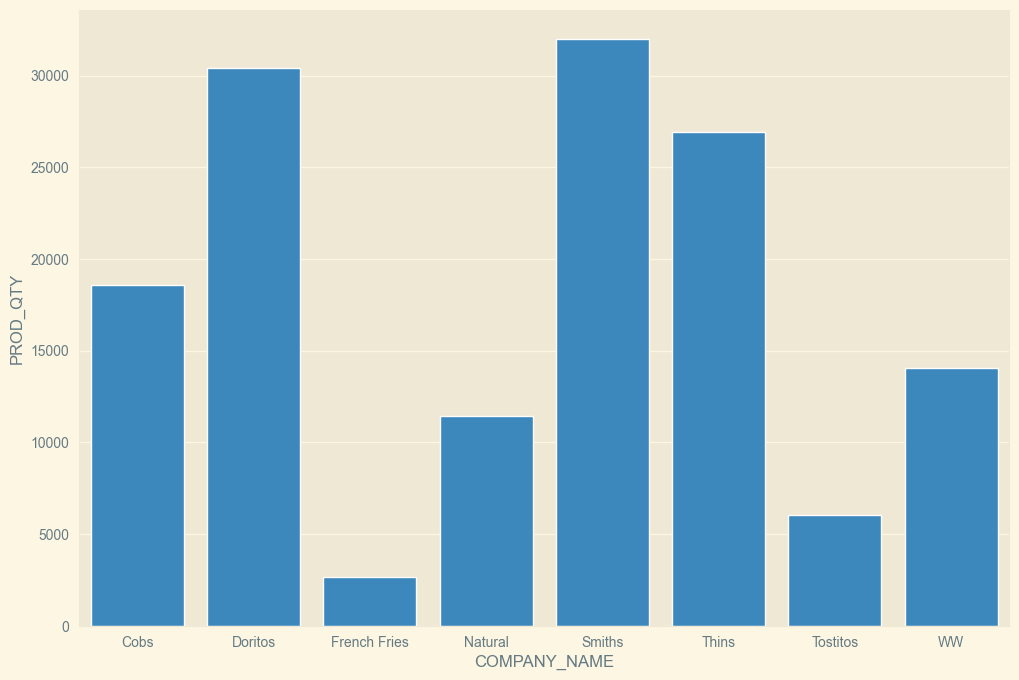

In [26]:
plt.figure(figsize=(12,8))
distribution_by_brand = transaction_df_chips.groupby('COMPANY_NAME').agg({'PROD_QTY':'sum'})
sns.barplot(x='COMPANY_NAME',y='PROD_QTY',data=distribution_by_brand)
plt.show()

### COMBINING DATE FRAMES

In [27]:
combined_df = pd.merge(transaction_df_chips,purchase_df,on='LYLTY_CARD_NBR')
combined_df.drop('DATE',axis=1,inplace=True)
combined_df.head(6)


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,converted_date,PRICE_PER_UNIT,day_of_week,month,weight,COMPANY_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,Wednesday,10,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,Monday,5,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00,Friday,8,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,5.70,Thursday,5,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20,3.90,Monday,8,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
5,5,5026,4527,83,WW D/Style Chip Sea Salt 200g,2,3.8,2018-09-17,1.90,Monday,9,200,WW,MIDAGE SINGLES/COUPLES,Budget


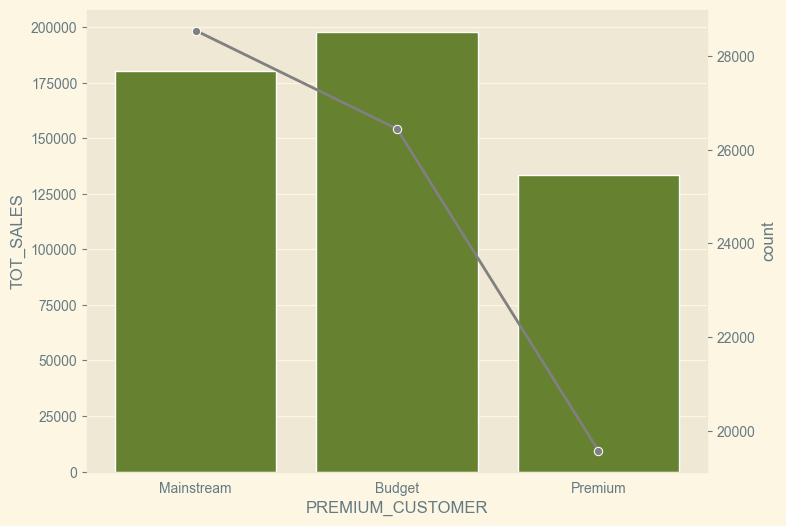

In [28]:

customer_spending = combined_df.groupby('PREMIUM_CUSTOMER').agg({"TOT_SALES":'sum'})
customer_count = combined_df['PREMIUM_CUSTOMER'].value_counts().reset_index().set_index('PREMIUM_CUSTOMER')

plt.figure(figsize=(8,6))

ax = sns.barplot(x='PREMIUM_CUSTOMER',y='TOT_SALES',data=customer_spending,color='olivedrab')
ax2 = ax.twinx()
sns.lineplot(x='PREMIUM_CUSTOMER',y='count',data=customer_count,ax=ax2,marker='o',color='grey')

plt.grid(visible=False)
plt.show()

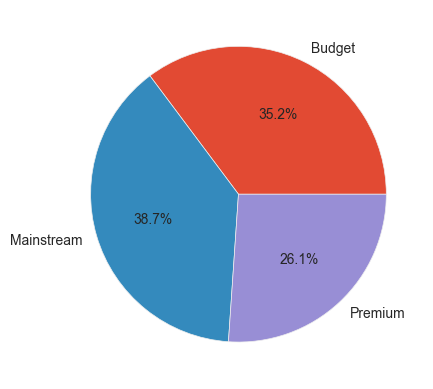

In [29]:
plt.style.use('ggplot')
plt.pie(data=customer_spending,x='TOT_SALES',autopct="%1.1f%%",
        labels=customer_spending.index)
plt.show()


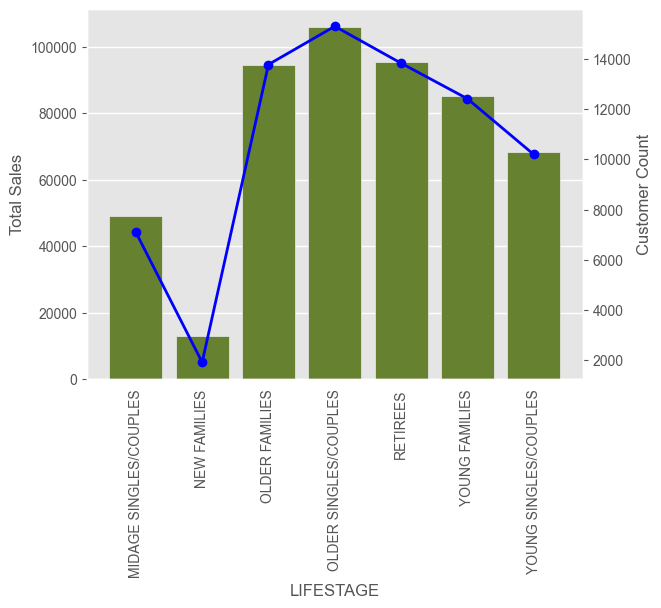

In [30]:

life_stage_distribution = combined_df.groupby('LIFESTAGE').agg({"TOT_SALES":'sum'}).reset_index()
customer_count_stage = combined_df['LIFESTAGE'].value_counts().reset_index()

life_stage_distribution = life_stage_distribution.sort_values(by='LIFESTAGE').reset_index(drop=True)
customer_count_stage = customer_count_stage.sort_values(by='LIFESTAGE').reset_index(drop=True)


ax = sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=life_stage_distribution, color='olivedrab')
plt.xticks(rotation=90)

ax2 = ax.twinx()

ax2.plot(customer_count_stage['LIFESTAGE'], customer_count_stage['count'], color='blue', marker='o', linestyle='-')

# Setting labels
ax.set_ylabel('Total Sales')
ax2.set_ylabel('Customer Count')

plt.grid(visible=False)
plt.show()

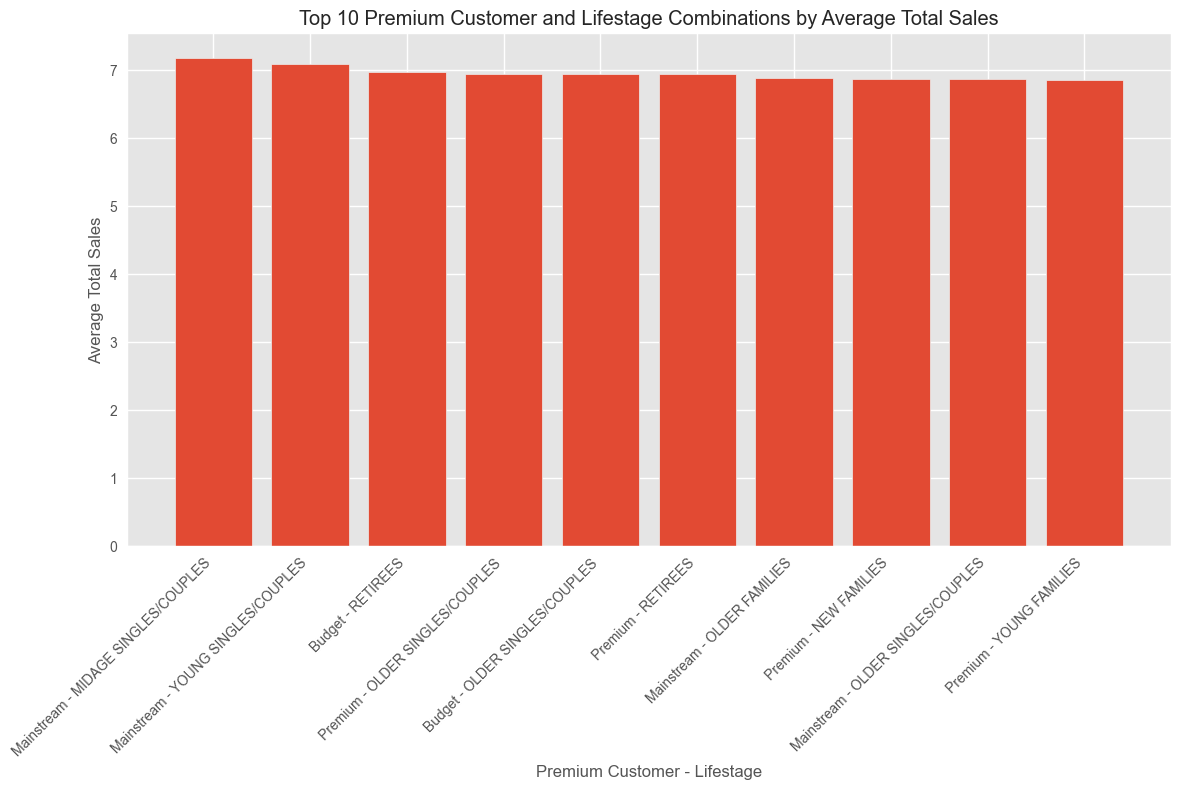

In [31]:
customer_type_lifestage= combined_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({'TOT_SALES': 'mean'}).sort_values('TOT_SALES', ascending=False).head(10).reset_index()
plt.figure(figsize=(12,8))
plt.bar(customer_type_lifestage['PREMIUM_CUSTOMER'] + ' - ' + customer_type_lifestage['LIFESTAGE'], customer_type_lifestage['TOT_SALES'])
plt.xlabel('Premium Customer - Lifestage')
plt.ylabel('Average Total Sales')
plt.title('Top 10 Premium Customer and Lifestage Combinations by Average Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [32]:

from scipy.stats import ttest_ind,mannwhitneyu
mainstream_midage_sales = combined_df[(combined_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (combined_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]['TOT_SALES']

mainstream_young_sales = combined_df[(combined_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (combined_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]['TOT_SALES']

In [33]:
t_test,p_val = ttest_ind(list(mainstream_midage_sales),list(mainstream_young_sales))
print("t-statistic:", t_test)
print("p-value:", p_val)

t-statistic: 1.6965249980337556
p-value: 0.08982118099353636


ValueError: 'top right' is not a valid value for loc; supported values are 'left', 'center', 'right'

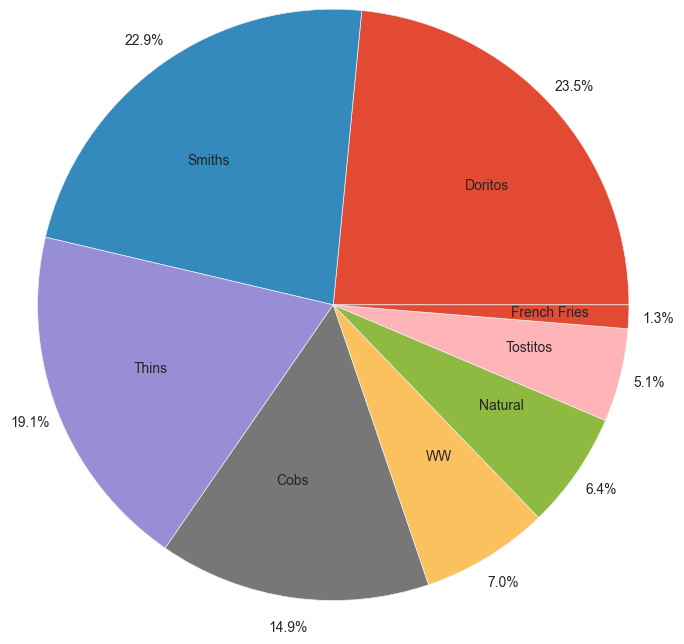

In [81]:

mainstream_midage_brand = combined_df[(combined_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (combined_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]['COMPANY_NAME'].value_counts()

plt.pie(x=mainstream_midage_brand.values,
        data=mainstream_midage_brand,
        autopct='%1.1f%%',
        labels=mainstream_midage_brand.index,
        pctdistance=1.1,
        labeldistance=.6,
        radius=2)

plt.show()

Text(0.5, 1.0, 'Major buyers preference')

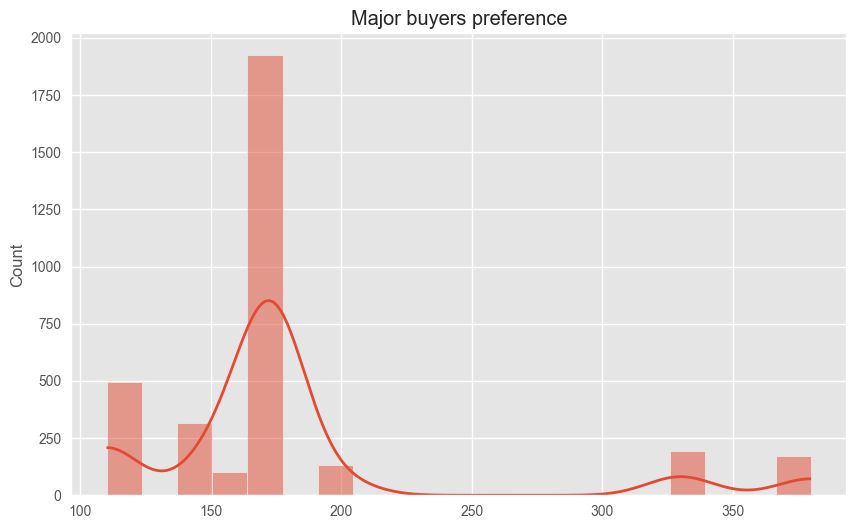

In [77]:
mainstream_midage_pkt_size = combined_df[(combined_df['PREMIUM_CUSTOMER'] == 'Mainstream') & (combined_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]['weight']
plt.figure(figsize=(10,6))

sns.histplot(data=mainstream_midage_pkt_size.values,kde=True,bins=20)
plt.title('Major buyers preference')